In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gtsrb-german-traffic-sign/Meta.csv
/kaggle/input/gtsrb-german-traffic-sign/Train.csv
/kaggle/input/gtsrb-german-traffic-sign/Test.csv
/kaggle/input/gtsrb-german-traffic-sign/Meta/37.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/35.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/11.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/31.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/4.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/40.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/33.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/9.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/.~lock.ClassesInformation.ods#
/kaggle/input/gtsrb-german-traffic-sign/Meta/14.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/1.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/39.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/20.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/38.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/2.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/10.png


In [2]:
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

2024-05-24 09:13:06.967546: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-24 09:13:06.967662: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-24 09:13:07.121775: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
os.getcwd()

'/kaggle/working'

In [4]:
new_dir = '/kaggle/input/gtsrb-german-traffic-sign/Train'

In [5]:
os.chdir(new_dir)

In [6]:
os.getcwd()

'/kaggle/input/gtsrb-german-traffic-sign/Train'

In [7]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in os.listdir(cur_path):
    dir = cur_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir+'/'+j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img, (30,30), interpolation = cv2.INTER_NEAREST)
        data.append(img)
        labels.append(i)
        
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [8]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [9]:
X_t1, X_t2, y_t1, y_t2 = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_t1.shape, X_t2.shape, y_t1.shape, y_t2.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [10]:
y_t1 = to_categorical(y_t1, 43)
y_t2 = to_categorical(y_t2, 43)

In [17]:
model1 = Sequential()
model1.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_t1.shape[1:]))
model1.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(rate=0.25))
model1.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model1.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(rate=0.25))
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(rate=0.5))
model1.add(Dense(43, activation='softmax'))

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
eps = 15
history = model.fit(X_t1, y_t1, batch_size=32, epochs=eps, validation_data=(X_t2, y_t2))

Epoch 1/15
 42/981 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9229 - loss: 0.3198

W0000 00:00:1716542747.952561      93 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


981/981 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9247 - loss: 0.2936

W0000 00:00:1716542754.596461      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716542755.149846      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


981/981 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9247 - loss: 0.2936 - val_accuracy: 0.9749 - val_loss: 0.0960
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9363 - loss: 0.2515 - val_accuracy: 0.9740 - val_loss: 0.0979
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9329 - loss: 0.2583 - val_accuracy: 0.9578 - val_loss: 0.1496
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9325 - loss: 0.2740 - val_accuracy: 0.9739 - val_loss: 0.0963
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9377 - loss: 0.2389 - val_accuracy: 0.9777 - val_loss: 0.0849
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9375 - loss: 0.2467 - val_accuracy: 0.9782 - val_loss: 0.0826
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9346 - loss: 0.2548 - val_accuracy: 0.9661 - val_loss: 0.1190
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9351 - loss: 0.2509 - val_accuracy: 0.9756 - val

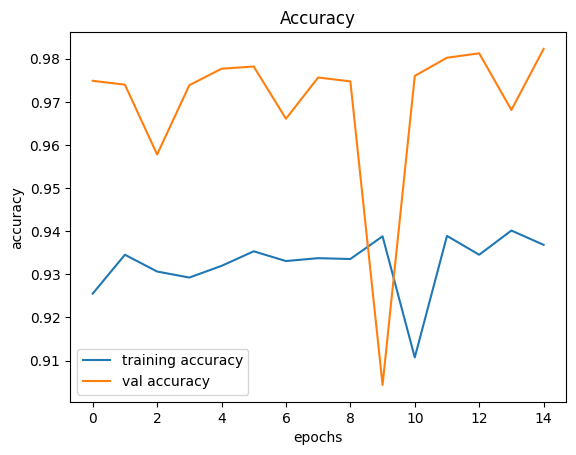

In [20]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

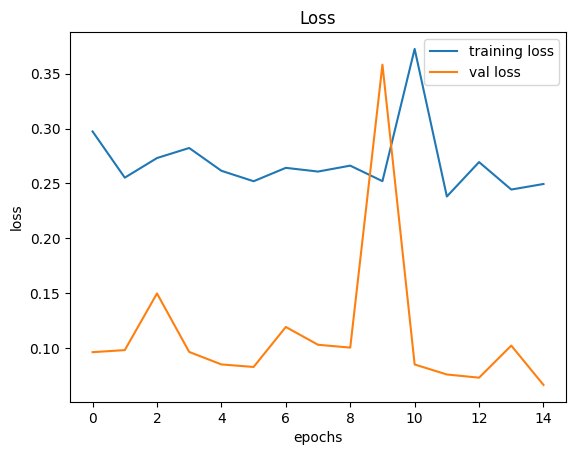

In [21]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [37]:
score = model.evaluate(X_t2, y_t2, verbose=0)
print('Test Loss', score[0])
print('Test accuracy', score[1])

Test Loss 0.06618162989616394
Test accuracy 0.9822749495506287


In [39]:
y_pred = model.predict(X_t2)
y_test_class = np.argmax(y_t2,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

108/246 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

W0000 00:00:1716543876.492321      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.98      0.98      0.98       444
           2       0.99      0.96      0.98       444
           3       1.00      0.92      0.96       295
           4       0.98      0.99      0.98       396
           5       0.92      0.96      0.94       338
           6       0.99      1.00      0.99        87
           7       0.99      0.97      0.98       324
           8       0.95      0.98      0.97       260
           9       1.00      1.00      1.00       274
          10       1.00      1.00      1.00       417
          11       0.99      0.97      0.98       258
          12       1.00      0.99      0.99       453
          13       0.99      0.99      0.99       431
          14       0.99      1.00      0.99       165
          15       0.99      0.99      0.99       134
          16       1.00      1.00      1.00        72
          17       1.00    

<Axes: >

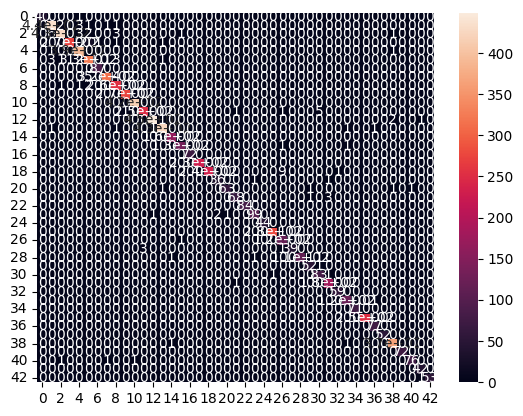

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_class, y_pred_class)
import seaborn as sns
sns.heatmap(cm,annot=True)


In [43]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred_class,y_test_class)
score

0.9822749298648304